In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shp 파일 시각화

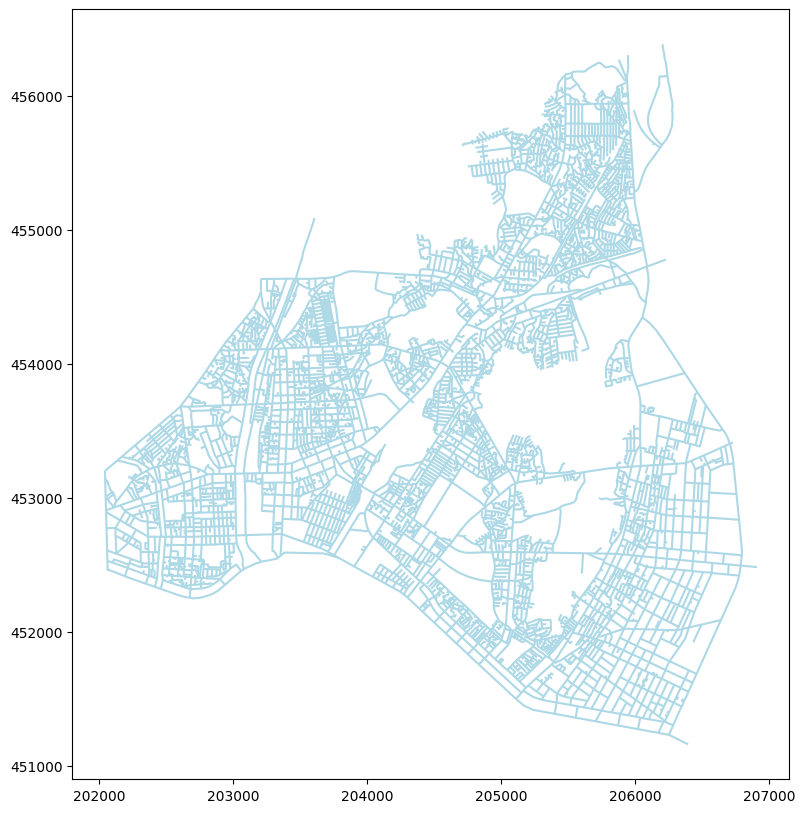

In [ ]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## 보안등 데이터

In [ ]:
# 보안등 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "보안등 데이터.csv"
security_light = pd.read_csv(f"{dir_path}/{file_name}")

In [ ]:
security_light.head()

,NO,SECLGT_LOCA_NM,INSTL_CNT,LOCPLC_RDNMADR,LOCPLC_LNNO_ADRES,LA,LO,INSTL_YR,INSTL_TYPE,MNAGN_TELNO,MNAGN_NM,DATA_STRD_DT,PLCST_NM,PLCST_DEPT_NM,PLCST_DEPT_CD,CTPR_PLAGC_NM
0,10211,강일동067,1,서울특별시 강동구 아리수로93가길,서울특별시 강동구 강일동137-8,37.576006,127.169241,NaN,한전주,02-3425-6373,서울특별시 강동구청,2021-08-25,서울강동경찰서,서울강동,G30000001329742,서울청
1,10212,강일동068,1,서울특별시 강동구 아리수로93가길,서울특별시 강동구 강일동137-3,37.576149,127.169137,NaN,한전주,02-3425-6373,서울특별시 강동구청,2021-08-25,서울강동경찰서,서울강동,G30000001329742,서울청
2,10213,강일동069,1,서울특별시 강동구 아리수로93가길 223,서울특별시 강동구 강일동139,37.576176,127.168800,NaN,한전주,02-3425-6373,서울특별시 강동구청,2021-08-25,서울강동경찰서,서울강동,G30000001329742,서울청
3,10214,강일동070,1,서울특별시 강동구 아리수로93가길,서울특별시 강동구 강일동26-3,37.576840,127.168722,NaN,한전주,02-3425-6373,서울특별시 강동구청,2021-08-25,서울강동경찰서,서울강동,G30000001329742,서울청
4,10215,강일동071,1,서울특별시 강동구 아리수로93가길,서울특별시 강동구 강일동20,37.576904,127.168868,NaN,전용주,02-3425-6373,서울특별시 강동구청,2021-08-25,서울강동경찰서,서울강동,G30000001329742,서울청


In [ ]:
# LOCPLC_RDNMADR 칼럼에서 "동대문구"를 포함한 데이터 필터링
security_light = security_light[security_light['LOCPLC_RDNMADR'].str.contains('동대문구', na=False)]

# 필요한 칼럼만 선택하고 칼럼 이름 변경
security_light = security_light[['LOCPLC_RDNMADR', 'LA', 'LO']].rename(columns={'LA': 'y', 'LO': 'x'})


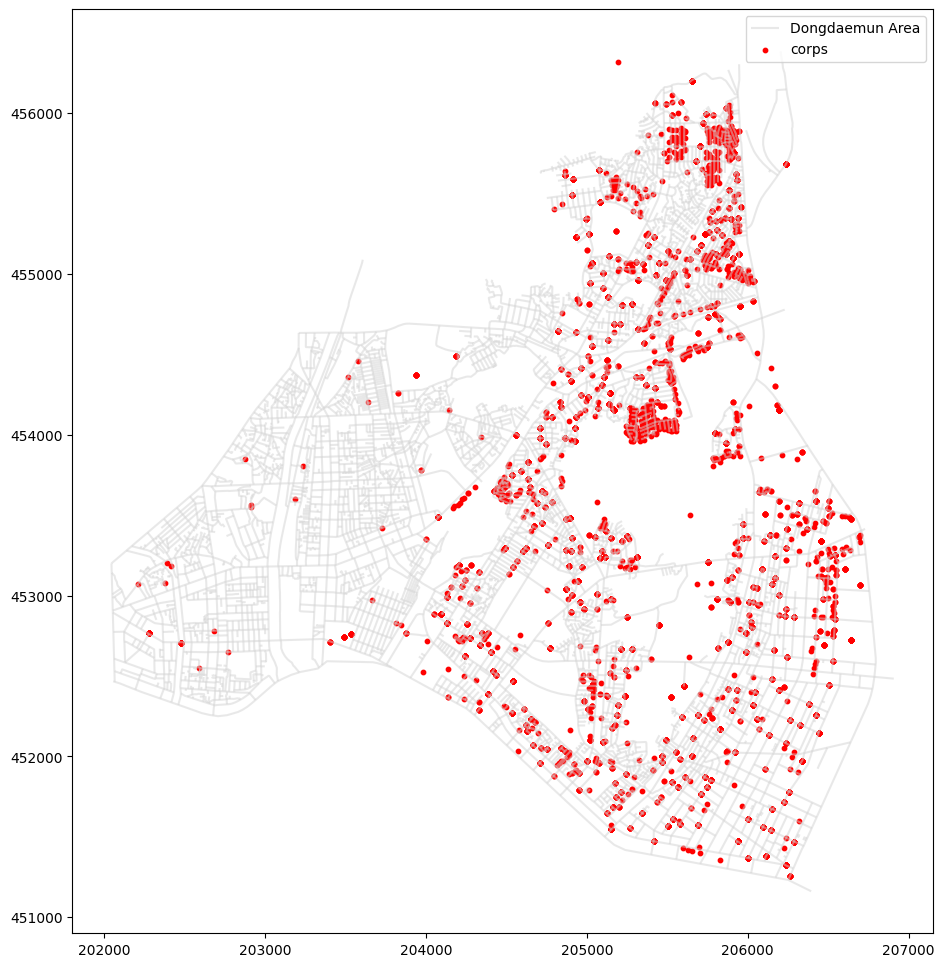

In [ ]:
# 보안등 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(security_light['x'], security_light['y'])]
security_light_geo = gpd.GeoDataFrame(security_light, geometry=geometry, crs="EPSG:4326")

# 보안등 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
security_light_geo = security_light_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 법인 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
security_light_geo.plot(ax=ax, color='red', markersize=10, label='corps')
plt.legend()
plt.show()

In [ ]:
# y 값의 최대값 찾기
max_y_value = security_light['y'].max()

# y 값이 최대값인 데이터 제거
security_light = security_light[security_light['y'] != max_y_value]

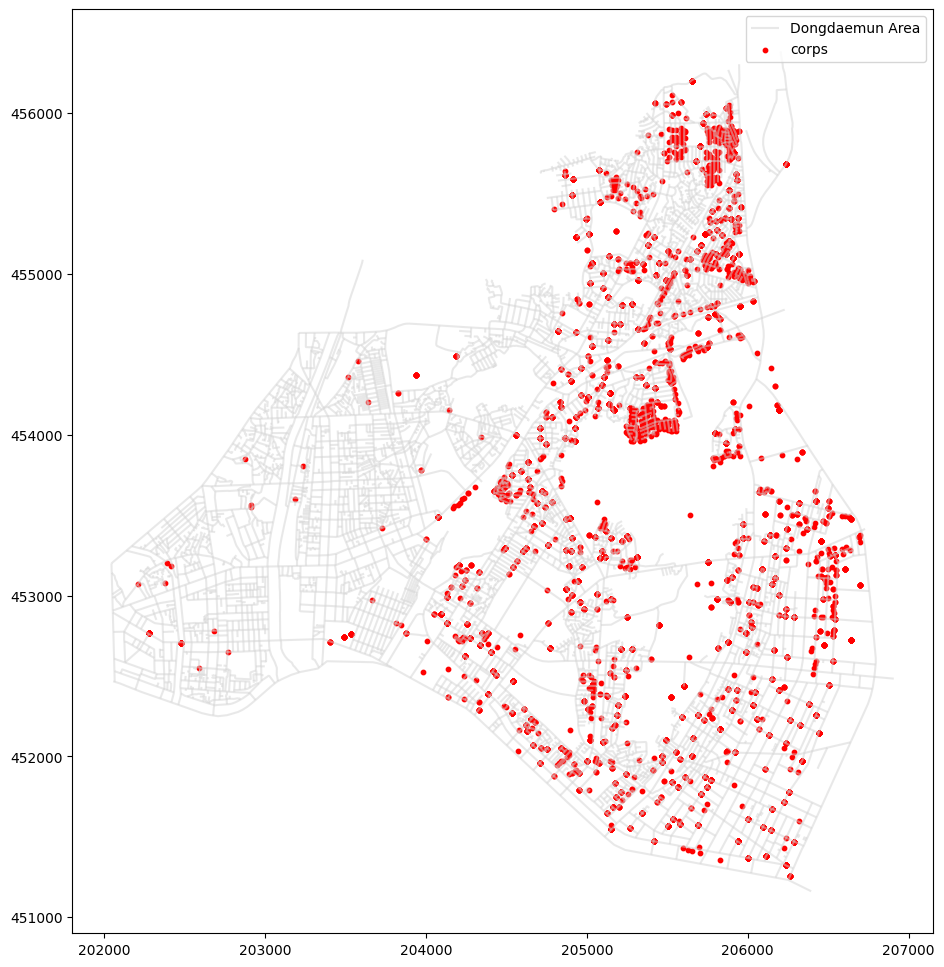

In [ ]:
# 보안등 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(security_light['x'], security_light['y'])]
security_light_geo = gpd.GeoDataFrame(security_light, geometry=geometry, crs="EPSG:4326")

# 보안등 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
security_light_geo = security_light_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 법인 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
security_light_geo.plot(ax=ax, color='red', markersize=10, label='corps')
plt.legend()
plt.show()

In [ ]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/보안등 데이터.csv"
security_light.to_csv(output_path, index=False, encoding='utf-8-sig')